## Data Loader

Created on SEP/11/2025  
Author: Nerveinvader  
Pipeline for loading and preprocessing Inner speech dataset  
Converting Raw into useful organized dataset  

Data = Subject 1/10, Session 1/3

In [2]:
import os
import numpy as np
import pandas as pd
import mne

In [3]:
# CONSTANTS

LOW_CUT: float = 0.5        # Low cut freq
HIH_CUT: float = 100.0      # High cut freq
NOTCH_FIL: float = 50.      # Notch filter freq (49.5-50.5)

SUBS_COUNT: int = 10        # Subject count
COND_COUNT: int = 3         # Conditions count (Inner, Pronoun, Rest)
CLAS_COUNT: int = 4         # Classes count (Arriba/U/31, Abajo/D, Derecha/R, Izquierda/L/34)

In [6]:
# Get the current working directory - for file managemnet
print(os.getcwd())

d:\Game Production\GithubProjects\MNE-Learning\MNE-intent-speech


In [4]:
# Data location (local)
DATA_LOCAL = "./data"
print(f"Dataset is ready: {os.path.isdir(DATA_LOCAL)}")
# List all the data inside the 'data' folder
print(f"{os.listdir(DATA_LOCAL)}\n##########")

Dataset is ready: True
['sub-01_ses-01_baseline-epo.fif', 'sub-01_ses-01_eeg-epo.fif', 'sub-01_ses-01_events.dat', 'sub-01_ses-01_exg-epo.fif', 'sub-01_ses-01_report.pkl', 'sub-01_ses-01_task-innerspeech_eeg.bdf']
##########


In [28]:
# Loading sample data
# BDF
DATA_BDF = "./data/sub-01_ses-01_task-innerspeech_eeg.bdf"
sample_raw = mne.io.read_raw_bdf(DATA_BDF, preload=True)
print(f"{sample_raw}\n##########")

Extracting EDF parameters from d:\Game Production\GithubProjects\MNE-Learning\MNE-intent-speech\data\sub-01_ses-01_task-innerspeech_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1875967  =      0.000 ...  1831.999 secs...
<RawEDF | sub-01_ses-01_task-innerspeech_eeg.bdf, 137 x 1875968 (1832.0 s), ~1.91 GiB, data loaded>
##########


In [5]:
# Func: Preprocessing (mne.io.BaseRaw)
def preprocess(raw: mne.io.BaseRaw) -> mne.io.BaseRaw:
    """
    Preprocess a raw `mne.io.BaseRaw`.bdf data:
	1. Filter signals 2. Remove band line at 50

    Returns
    -------
    mne.io.BaseRaw : processed .bdf file.
    """
    preprocess_raw: mne.io.BaseRaw = raw.copy()
    preprocess_raw.filter(l_freq=LOW_CUT, h_freq=HIH_CUT, fir_design='firwin', verbose="error")
    preprocess_raw.notch_filter(NOTCH_FIL)
    return preprocess_raw

Effective window size : 2.000 (s)
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 6759 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    6.4s finished


Effective window size : 2.000 (s)
Plotting power spectral density (dB=True).


C:\Users\aminr\AppData\Local\Temp\ipykernel_9316\918729140.py:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  pp_raw.compute_psd(fmax=120).plot()
d:\anaconda3\envs\mne_tf_env\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


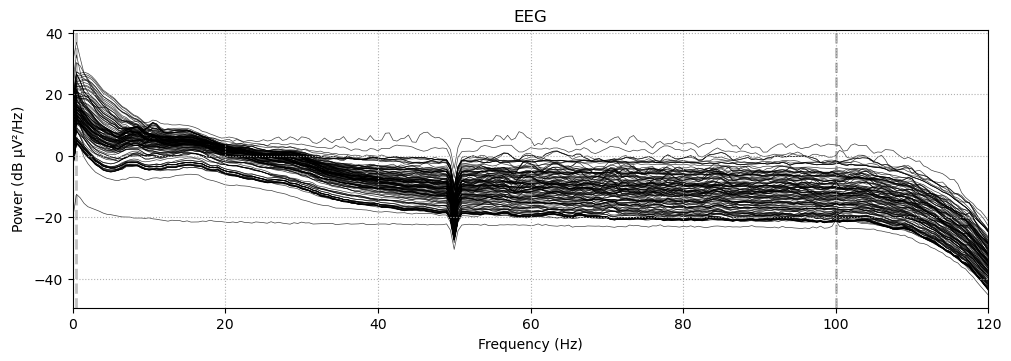

In [35]:
# Sample Visualization
# BDF
sample_raw.compute_psd(fmax=120)
pp_raw = preprocess(sample_raw)
pp_raw.compute_psd(fmax=120).plot()

In [41]:
# Reading pickle file (derivative)
DATA_PKL = "./data/sub-01_ses-01_report.pkl"
pd.read_pickle(DATA_PKL)

{'Age': 56,
 'Gender': 'F',
 'Recording_time': 1832,
 'Ans_R': 43,
 'Ans_W': 2,
 'EMG_trials': array([ 44.,  55.,  56.,  59., 148., 155.]),
 'Power_EXG7': array([1.66555993e-09, 1.78973692e-10, 3.09067948e-11, 4.65290829e-10,
        3.16289043e-09, 1.00091801e-09]),
 'Power_EXG8': array([1.40977914e-09, 3.52279347e-10, 2.23067212e-10, 5.91289131e-10,
        6.02205634e-09, 6.62926101e-10]),
 'Baseline_EXG7_mean': np.float64(2.1510271959948184e-10),
 'Baseline_EXG8_mean': np.float64(6.148708634155476e-11),
 'Baseline_EXG7_std': np.float64(1.5097728063882982e-10),
 'Baseline_EXG8_std': np.float64(4.116691114385579e-11)}

In [44]:
report = pd.read_pickle(DATA_PKL)
emg_trials = report['EMG_trials']
print(len(emg_trials))

6


In [90]:
# Reading dat file (derivative)
DATA_EVENT = "./data/sub-01_ses-01_events.dat"
with open(DATA_EVENT, 'rb') as file:
    sample_dat = pd.read_pickle(file)
print("Events file structure:\nSample Num / Class UDRL / Condition PIR / Session 1-3")
print(f"{sample_dat[:, 3]}\n##########")

Events file structure:
Sample Num / Class UDRL / Condition PIR / Session 1-3
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
##########


In [6]:
# Reading fif files (derivative)
DATA_FIF = "./data/sub-01_ses-01_eeg-epo.fif"
sample_fif = mne.read_epochs(DATA_FIF, preload=True)
print(f"{sample_fif}\n")
print(f"{sample_fif.events}")
print("\n##########")

Reading d:\Game Production\GithubProjects\MNE-Learning\MNE-intent-speech\data\sub-01_ses-01_eeg-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -500.00 ...    4000.00 ms
        0 CTF compensation matrices available
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
<EpochsFIF | 200 events (all good), -0.5 – 4 s (baseline off), ~225.3 MiB, data loaded,
 'Arriba': 50
 'Abajo': 50
 'Derecha': 50
 'Izquierda': 50>

[[  39869       0      34]
 [  46491       0      31]
 [  53010       0      34]
 [  59649       0      34]
 [  66270       0      33]
 [  73063       0      32]
 [  79838       0      34]
 [  86528       0      32]
 [  93064       0      34]
 [  99823       0      32]
 [ 106461       0      31]
 [ 113015       0      31]
 [ 119824       0      34]
 [ 126651       0      33]
 [ 133289       0      32]
 [ 139996       0      31]
 [ 146669       0      31]
 [ 153154       0      34]
 [ 159691    

Using matplotlib as 2D backend.


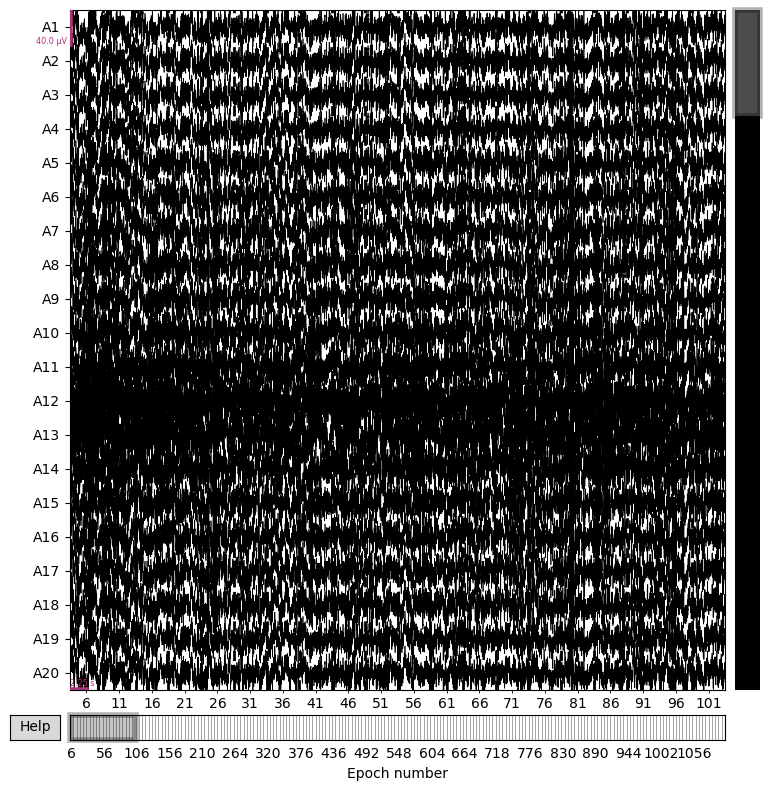

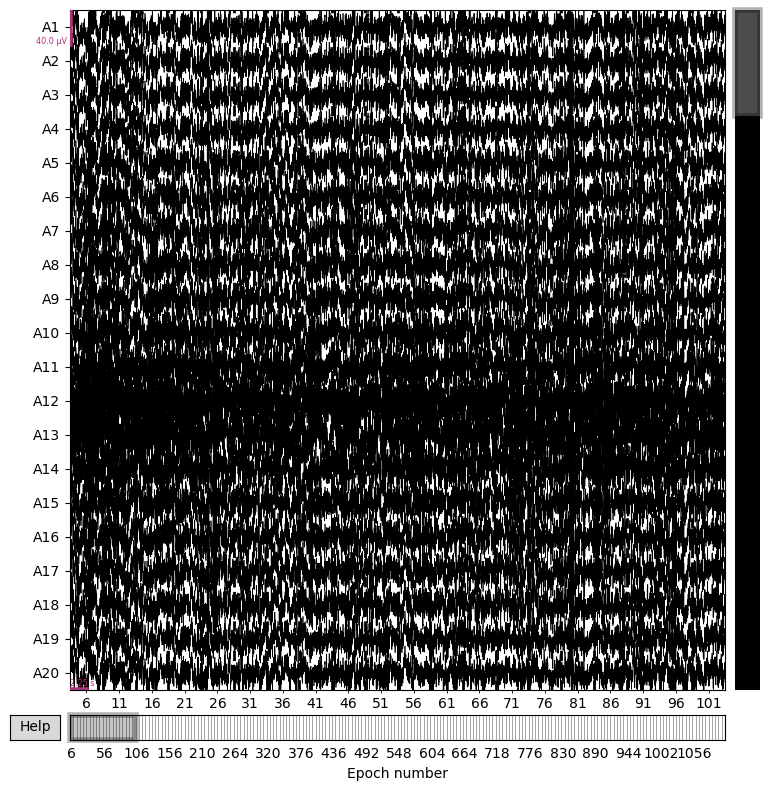

In [ ]:
sample_fif.plot()

In [92]:
# Reading baseline fif file
DATA_BASE = "./data/sub-01_ses-01_baseline-epo.fif"
sample_base = mne.read_epochs(DATA_BASE, preload=True)
print(f"{sample_base.events}\n")

Reading d:\Game Production\GithubProjects\MNE-Learning\MNE-intent-speech\data\sub-01_ses-01_baseline-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...   15000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
[[16591     0    13]]



## Preparing data for model


In [ ]:
condition_map = {0:'overt', 1:'inner', 2:'rest'} # overt = pronounce/d
y_eeg_label = [condition_map[c] for c in sample_dat[:, 2]] # human-readable
y_map = {0: 0, 1: 1, 2: 2}
y_eeg = [y_map[c] for c in sample_dat[:, 2]] # 0-1-2 format for model

X_eeg = sample_fif.get_data()
assert len(X_eeg) == len(y_eeg_label) == 200, "Mismatch!"
print("Label counts - Sub01-Ses1: ", {k: y_eeg_label.count(k) for k in set(y_eeg_label)})

80
Label counts - Sub01-Ses1:  {'inner': 80, 'overt': 40, 'rest': 80}


In [127]:
# Checking EEG Epoch shape
# [n_sample, n_channels, time_points]
print("Data Shape:", X_eeg.shape)

Data Shape: (200, 128, 1153)


In [108]:
# Checking EEG Epoch Channel names
ch_names = sample_fif.ch_names
print("Channel Names:\n", ch_names) # 128 Ch

Channel Names:
 ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32']


In [110]:
# Checking EEG Epoch Sampling Rate (Freq)
print("Sampling Rate:", sample_fif.info['sfreq'], "Hz")

Sampling Rate: 256.0 Hz


In [116]:
# Checking EEG Epoch time property
# Time: -0.5 to 4.0 (Num = 1153)
print(f"Time points (sec): {sample_fif.times}\nNumber of time points: {len(sample_fif.times)}")


Time points (sec): [-0.5        -0.49609375 -0.4921875  ...  3.9921875   3.99609375
  4.        ]
Number of time points: 1153


In [118]:
# If 'MISMATCH' found, then develop it here...
# Crop, Resample, Pick

### Reference Point

In [126]:
ref_info = {
    'n_ch': len(sample_fif.ch_names),
    'ch_names': sample_fif.ch_names,
    'sfreq': sample_fif.info['sfreq'],
    'tmin': -0.5, 'tmax': 4.0,
    'n_times': len(sample_fif.times)
}
pd.to_pickle(ref_info, 'eeg_epo_reference.pkl') # save to directory

In [137]:
# Split data for Train-Test e.g., 80/20
# X_eeg and y_eeg
# Temp for testing purpose
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_eeg, y_eeg, test_size=0.3,
    stratify=y_eeg,
    random_state=42,
    shuffle=True
)

In [172]:
# Printing the split info
def count_labels(y):
    counts = np.bincount(y)
    return dict(zip(['0 - Overt', '1 - Inner','2 - Rest'], counts))

print("Train Data Shape: ", X_train.shape)
print("Training labels:  ", count_labels(y_train))
print("Eval Data Shape:  ", X_test.shape)
print("Evaluation labels:", count_labels(y_test))

Train Data Shape:  (140, 128, 1153)
Training labels:   {'0 - Overt': np.int64(28), '1 - Inner': np.int64(56), '2 - Rest': np.int64(56)}
Eval Data Shape:   (60, 128, 1153)
Evaluation labels: {'0 - Overt': np.int64(12), '1 - Inner': np.int64(24), '2 - Rest': np.int64(24)}


In [177]:
# Saving split
np.savez_compressed(
    'data/split/sub-01_ses-01_splits.npz',
    X_train=X_train, X_test=X_test,
    y_train=y_train, y_test=y_test,
)
print("Saved Train-Test Split for Subject 01 Session 01 (data/split/sub-01_ses-01_splits.npz)")
print("Later, Load with np.load('file_name) method.")

Saved Train-Test Split for Subject 01 Session 01 (data/split/sub-01_ses-01_splits.npz)
Later, Load with np.load('file_name) method.
